In [1]:
%matplotlib inline
%run util_draw.py
# import sys
# from matplotlib import rc
# rc('text', usetex=True)
from ExpData import ExpData
from ExpData import SimData
import ExpData as ed
import math

In [2]:
E1F_E0 = 5.497
E16_E0 = 5.754
E1F_LUM = 19.844e6
E16_LUM = 28.1e6

PI = 3.14159265358979312
FSC = 0.00729735253
A = FSC
NA = 6.02214129E23
QE = 1.60217646E-19
MP = 0.93827203
MOMEGA = 0.78265
WOMEGA = 0.00849
BR = 0.891

def mdraw2d(hists, rows=2, cols=3, xlabel='', ylabel='',
            xlims=None, ylims=None, vmin=None, vmax=None,
            space=0, grid=False, figsize=None, **kwargs):
    nr, nc = rows, cols
    if figsize is None:
        figsize=goldenaspect(6.5,nr,nc)
    fig = plt.figure(figsize=figsize)
    gs = gridspec.GridSpec(nr, nc, wspace=space, hspace=2*space, left=0.1, right=0.95, bottom=0.175)
    im = None
    gmin = min([h.GetMaximum() for h in hists]) if vmin is None else vmin
    gmax = max([h.GetMaximum() for h in hists]) if vmax is None else vmax
    mult = 1.0 if gmin<=0.9*gmax else 0.9
    vmax = mult*gmax if vmax is None else vmax
    for irow in range(0,nr):
        for icol in range(0,nc):
            hnum = nc*irow+(icol+1)
            h = hists[hnum-1]
            ax = plt.subplot(gs[irow, icol])
            im = rplt.imshow(asrootpy(h), axes=ax, vmin=vmin, vmax=vmax, **kwargs)
#             rplt.hist2d(h, axes=ax, **kwargs) #, norm=LogNorm())
            if xlims is not None:
                plt.xlim(xlims)
            if ylims is not None:
                plt.ylim(ylims)
            if icol > 0:
                ax.set_yticklabels('')
            if irow+1 < nr:
                ax.set_xticklabels('')
            if grid is True:
                plt.grid()
    fig.add_axes([0.06, 0.105, 0.94, 0.895], frameon=False)
    plt.xticks([])
    plt.yticks([])
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
#     fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.975, 0.2, 0.02, 0.7])
    fig.colorbar(im, cax=cbar_ax)
    return fig

def nu(w, q2):
    return (w*w-MP*MP+q2)/(2*MP)


def epsilon(w, q2, e0=E1F_E0):
    n = nu(w, q2)
    e1 = e0-n
    epsInv = 1+2*(q2+n*n)/(4*e0*e1-q2)
    return 1.0/epsInv


def vgflux(w, q2, e0=E1F_E0):
    eps = epsilon(w, q2)
    return A*w*(w*w-MP*MP)/(4*PI*e0*e0*MP*MP*q2*(1-eps))


def xbjork(w, q2):
    return q2/(2*MP*nu(w, q2))

def interp_nn(h, ibin0):
    iL,iR = 0,0
    vL,vR = 0,0
    eL,eR = 0,0
    for ibin in range(ibin0+1,h.GetNbinsX()+1):
        v,e = h.GetBinContent(ibin),h.GetBinError(ibin)
        if v!=0:
            iR = ibin
            vR = v
            eR = e
            break
    for ibin in reversed(range(1,ibin0)):
        v,e = h.GetBinContent(ibin),h.GetBinError(ibin)
        if v!=0:
            iL = ibin
            vL = v
            eL = e
            break
    vL = vR if iL==0 else vL
    vR = vL if iR==0 else vR
    e = (eL**2+eR**2)**0.5
    if vL == vR:
        return (vL, e)
    else:
        #y = y1+m(x-x1)
        m = (vR-vL)/(iR-iL)
        return (vL+m*(ibin0-iL), e)

def w8d_Q2_mean(Q2_0, Q2_1):
    n = math.log(Q2_1)-math.log(Q2_0)
    d = 1/Q2_0-1/Q2_1
    return n/d

In [3]:
e1f_sim = SimData()
dirin = '/home/ephelps/projects/phys-ana-omega/e1f6/test'
fns = ['e1f_sim_skim_top1_ho.root', 'e1f_sim_skim_top1_321_ho.root', 'e1f_sim_skim_top1_326_ho.root']
for fn in fns:
        e1f_sim.add_sim('%s/%s'%(dirin,fn))

1 /home/ephelps/projects/phys-ana-omega/e1f6/test/e1f_sim_skim_top1_ho.root
10 10
41 50
756655 378836.018131519
551496 85388.65297293769
2 /home/ephelps/projects/phys-ana-omega/e1f6/test/e1f_sim_skim_top1_321_ho.root
10 10
41 50
348473 0.0
291753 66.98756610457494
3 /home/ephelps/projects/phys-ana-omega/e1f6/test/e1f_sim_skim_top1_326_ho.root
10 10
41 50
348474 0.0
289487 52.98809553201723


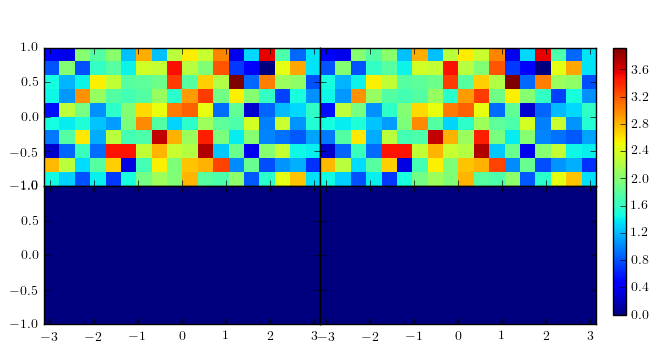

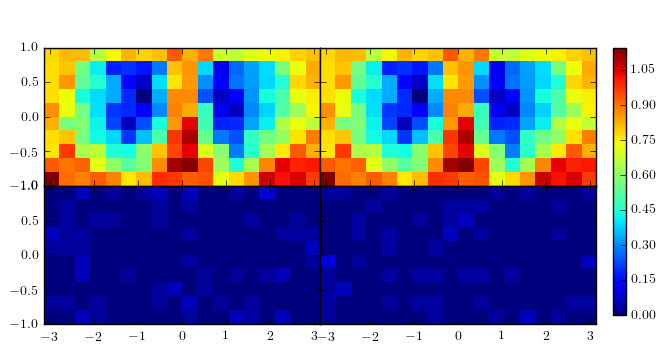

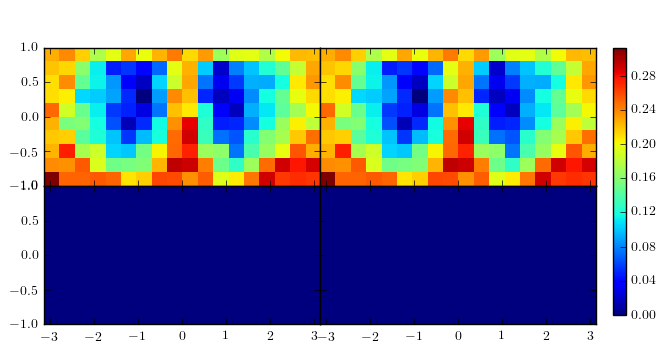

In [5]:
W, Q2 = 1.8, [2.75, 3.25]
e1f_accs = e1f_sim.get_acc2d(W, Q2, 0.15)

hts, hrs, has = [], [], []
for hss in e1f_accs:
    hts.append(hss[0])
    hrs.append(hss[1])
    has.append(hss[2])

for hss in [hts, hrs, has]:
    mdraw2d(hss, 2, 2)

In [4]:
e1f_binned = ExpData('/home/ephelps/projects/phys-ana-omega/e1f6/test/e1f_exp_h6_top1.root')
e16_binned = ExpData('/home/ephelps/projects/phys-ana-omega/e1f6/test/e16_exp_h6_top1.root')

Setting up binned data for /home/ephelps/projects/phys-ana-omega/e1f6/test/e1f_exp_h6_top1.root:h6_eid_efid_nphe_hfid_pcor_badsc_mmp
Setting up binned data for /home/ephelps/projects/phys-ana-omega/e1f6/test/e16_exp_h6_top1.root:h6_eid_efid_nphe_hfid_pcor_badsc_mmp


In [5]:
e16_sim = SimData()
dirin = '/home/ephelps/projects/phys-ana-omega/e1f6/test'
fns = ['e16_sim_skim_top1_lt320_ho.root', 'e16_sim_skim_top1_321_ho.root', 'e16_sim_skim_top1_326_ho.root']
for fn in fns:
        e16_sim.add_sim('%s/%s'%(dirin,fn))

In [17]:
def calc_diff_xsects(W, Q2, suppress_chatter=False,
                     exparms=(e1f_binned, e1f_sim, E1F_E0, E1F_LUM)):
    binned, sim, e0, lum = exparms
    h2_exp_set = binned.get_h2s(W, Q2)
    h2_sim_set = sim.get_acc2d(W, Q2, 0.15)

    h2e_b4acc = h2_exp_set[0]

    h2a = h2_sim_set[0][4]

    h2e = h2_exp_set[0].Clone('%s_diffs'%h2_exp_set[0].GetName())
    h2e.Divide(h2a)

    result = h2_exp_set[1]

    hacc,herr = ed.get_vhists(h2_sim_set[0][2])
    hacc.SetBinContent(1,0)
    herr.SetBinContent(1,0)

    if not suppress_chatter:
        fig = mdraw([hacc,herr], 2,1)
        for ax in fig.get_axes():
            ax.set_xlim(0, 0.4)
            ax.set_ylim(0)
            ax.grid()
        # draw(hacc)
        # plt.ylim(0)
        # plt.xlim(0,0.2)
        # draw(herr)
        # plt.ylim(0)
        # plt.xlim(0,0.2)

    if not suppress_chatter:
        draw(result[2])
        fitted_points = get_points_from_TF1(result[4], 0.6, 0.95)
        X, Y = zip(*fitted_points)
        Y_bg = [ed.bgfun([x], result[3]) for x in X]
        plt.plot(X, Y)
        plt.plot(X, Y_bg)
        plt.vlines(0.825,0,3500)
        plt.grid()
        plt.show()

    hs = [h2e_b4acc,h2a,h2e]

    if not suppress_chatter:
        fig = mdraw(hs,3,1)
        for h,ax in zip(hs,fig.axes):
            im = rplt.imshow(asrootpy(h), axes=ax)
            plt.colorbar(im, ax=ax) #clim=(h.GetMinimum(),h.GetMaximum()), ax=ax)
            plt.tight_layout()

    W, _, _, _ = ed.get_adjusted_edges(binned.h6y.GetAxis(0), W)
    Q2, _, _, _ = ed.get_adjusted_edges(binned.h6y.GetAxis(1), Q2)
    avgQ2 = w8d_Q2_mean(Q2[0],Q2[1])
    avgW = sum(W)/2 if isinstance(W, list) else W
    dW = 0.02 if not isinstance(W, list) else W[1]-W[0]
    dQ2 = 0.05 if not isinstance(Q2, list) else Q2[1]-Q2[0]
    dPHI, dCOST = 2*PI/18, 0.2
    xb = xbjork(avgW, avgQ2)
    eps = epsilon(avgW, avgQ2, e0)
    flux = vgflux(avgW, avgQ2, e0)
    normval = BR*lum*flux*dW*dQ2*dCOST*dPHI

    def dcoss(x, p):
        return p[0]+p[1]*math.cos(x[0])+p[2]*math.cos(2*x[0])

    fcoss = R.TF1('fcoss', dcoss, -PI, PI, 3)
    fpol0 = R.TF1('fpol0', lambda x,p: p[0], -PI, PI, 1)
    hphis, holes, pcoss = [], [], []
    for ibin in range(1,h2e.GetNbinsY()+1):
        hphi = asrootpy(h2e.ProjectionX('%s_%d'%(h2e.GetName(),ibin),ibin,ibin))
        hphi.Scale(1/normval)
        these_holes = hphi.Clone('%s_holes'%h2e.GetName())
        these_holes.Reset()
        for ix in range(1,hphi.GetNbinsX()+1):
            if hphi.GetBinError(ix) == 0:
                nnval, nnerr = interp_nn(hphi, ix)
                these_holes.SetBinContent(ix, nnval)
                these_holes.SetBinError(ix, nnerr)
                hphi.SetBinContent(ix, nnval)
                hphi.SetBinError(ix, nnerr)
        hphi.Fit(fcoss, 'N0', 'goff')
        fcoss_parms = [(fcoss.GetParameter(i),fcoss.GetParError(i)) for i in range(0,3)]
        if not suppress_chatter:
            print('\n'.join([str(parm) for parm in fcoss_parms]))
            print('-')
        pcoss.append(fcoss_parms)
        holes.append(these_holes)
        hphis.append(hphi)
        
    if not suppress_chatter:
        fig = mdraw(hphis, 2,5)
        for i,ax in enumerate(fig.axes):
            Xlin = np.linspace(-PI, PI)
            for iparm, (parm,err) in enumerate(pcoss[i]):
                fcoss.SetParameter(iparm, parm)
            Ycoss = [fcoss.Eval(x) for x in Xlin]
            ax.plot(Xlin, Ycoss, 'g')
            XY = [(x, y) for (x, y) in zip(list(holes[i].x()), list(holes[i].y())) if y!=0]
            Yerr = [yerr[0] for (x, yerr) in zip(list(holes[i].x()), list(holes[i].yerr())) if yerr[0]!=0]
            if len(XY)>0:
                X, Y = zip(*XY)
                ax.errorbar(X, Y, Yerr, fmt='ro', zorder=20)
            ax.grid()
    #         ax.vlines(X, -1000, 3000, 'r', linestyles='dashed')
    plt.show()

    int_2d = 0
    for hphi in hphis:
        int_2d += hphi.Integral('width')*0.2

    int_2d_0 = 0
    int_2d_1 = 0
    for pcos in pcoss:
        for iparm, (parm,err) in enumerate(pcos):
            fcoss.SetParameter(iparm, parm)
        int_2d_0 += sum([fcoss.Eval(x) for x in hphi.x()])*0.2*2*PI/18
        int_2d_1 += pcos[0][0]*0.2*2*PI
    
    if not suppress_chatter:
        print('bjorken=%.3f'%xb)
        print('Q2=%.3f'%avgQ2)
        print('W=%.3f'%avgW)
        print('epsilon=%.3f'%eps)
        print('xsect_f=%.1f (alt: %.1f)'%(int_2d_0, int_2d_1))
        print('xsect_d=%.1f'%int_2d)
    return (xb, avgQ2, avgW, eps, int_2d_0, int_2d, (W, Q2))

In [13]:
# import imp
# imp.reload(ed)

<module 'ExpData' from '/home/ephelps/projects/phys-ana-omega/worksheets/ExpData.py'>

In [18]:
e1f_exparms = (e1f_binned, e1f_sim, E1F_E0, E1F_LUM)
e16_exparms = (e16_binned, e16_sim, E16_E0, E16_LUM)

W_0, W_1, = 1.73, 2.21
Ws = np.arange(W_0, W_1, 0.04)
# Q2 = [2.2, 2.5]
# Ws = [2, 2.21, 2.47]
Q2 = [2.2, 2.5]
# Q2 = [2.75, 3.25]
e1f_xsects_Q2_2p2_2p5 = [calc_diff_xsects(w, Q2, True, e1f_exparms) for w in Ws]
e16_xsects_Q2_2p2_2p5 = [calc_diff_xsects(w, Q2, True, e16_exparms) for w in Ws]

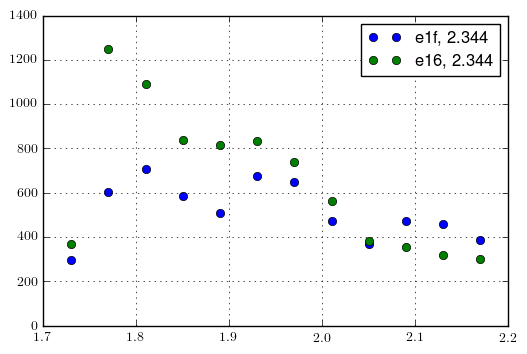

In [19]:
avgQ2 = e1f_xsects_Q2_2p2_2p5[0][1]
XY = [(xsect[2], xsect[5]) for xsect in e1f_xsects_Q2_2p2_2p5]
X,Y = zip(*XY)
plt.plot(X, Y, 'o', label='e1f, %.3f'%avgQ2)
XY = [(xsect[2], xsect[4]) for xsect in e16_xsects_Q2_2p2_2p5]
X,Y = zip(*XY)
plt.plot(X, Y, 'o', label='e16, %.3f'%avgQ2)
# XY = [(xsect[2], xsect[4]) for xsect in e1f_xsects_Q2_2p2_2p5]
# X,Y = zip(*XY)
# plt.plot(X, Y, 'o', label='ffit, %.3f'%avgQ2)
plt.legend()
plt.ylim(0)
plt.grid()
plt.show()

In [21]:
e1f_exparms = (e1f_binned, e1f_sim, E1F_E0, E1F_LUM)
e16_exparms = (e16_binned, e16_sim, E16_E0, E16_LUM)

W_0, W_1, = 1.73, 2.21
Ws = np.arange(W_0, W_1, 0.02)

Q2ranges = [
    [1.9,2.15], [2.15, 2.45],
    [2.45, 2.75], [2.75, 3.1],
    [3.1, 3.6], [3.6, 4.1],
]

# Q2 = [2.2, 2.5]
# Ws = [2, 2.21, 2.47]
e1f_xsects, e16_xsects = [], []
for Q2 in Q2ranges:
    e1f_xsects.append([calc_diff_xsects(w, Q2, True, e1f_exparms) for w in Ws])
    e16_xsects.append([calc_diff_xsects(w, Q2, True, e16_exparms) for w in Ws])

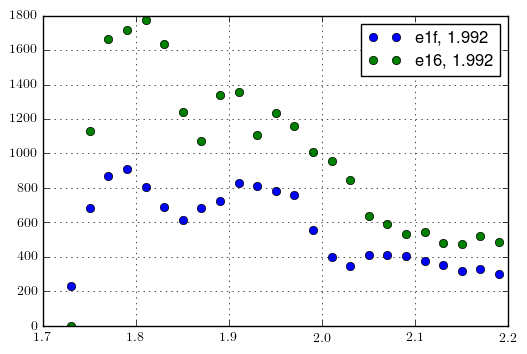

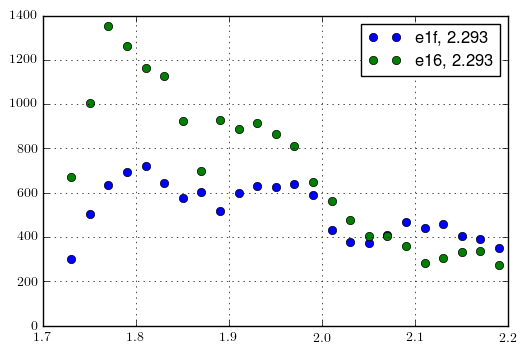

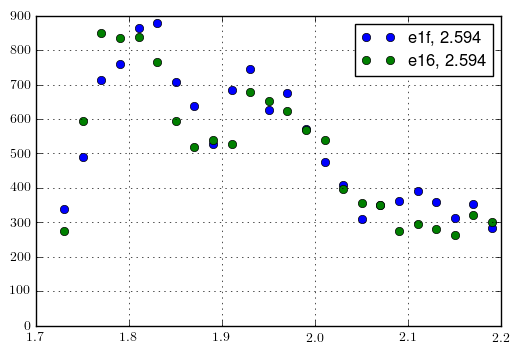

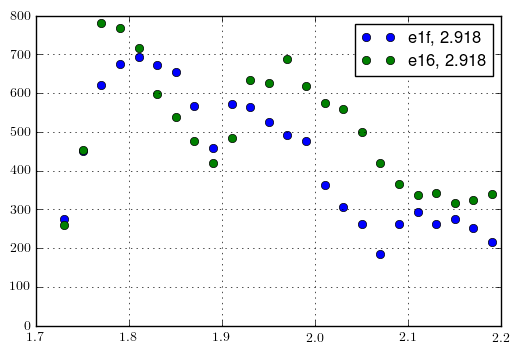

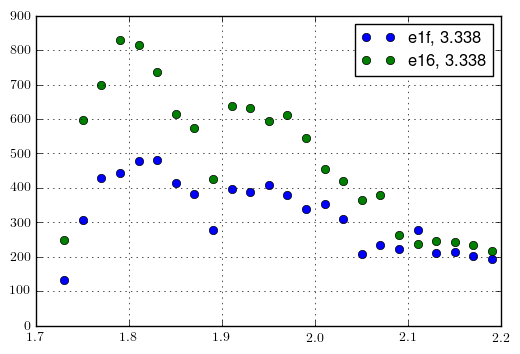

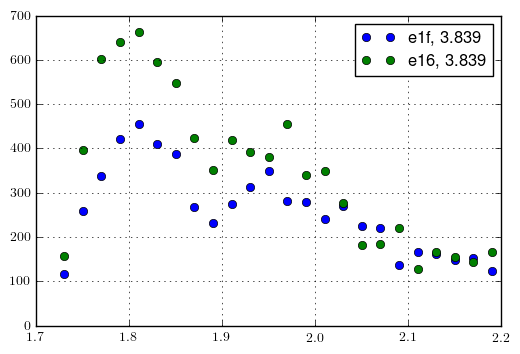

In [22]:
for e1f_xsect, e16_xsect in zip(e1f_xsects, e16_xsects):
    e1f_avgQ2 = e1f_xsect[0][1]
    e16_avgQ2 = e16_xsect[0][1]
    XY = [(xsect[2], xsect[5]) for xsect in e1f_xsect]
    X,Y = zip(*XY)
    plt.plot(X, Y, 'o', label='e1f, %.3f'%e1f_avgQ2)
    XY = [(xsect[2], xsect[4]) for xsect in e16_xsect]
    X,Y = zip(*XY)
    plt.plot(X, Y, 'o', label='e16, %.3f'%e16_avgQ2)
    # XY = [(xsect[2], xsect[4]) for xsect in e1f_xsects_Q2_2p2_2p5]
    # X,Y = zip(*XY)
    # plt.plot(X, Y, 'o', label='ffit, %.3f'%avgQ2)
    plt.legend()
    plt.ylim(0)
    plt.grid()
    plt.show()

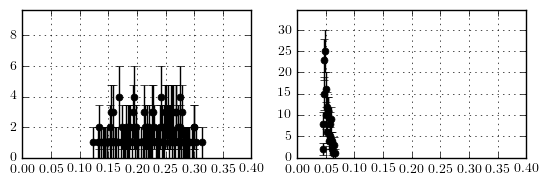

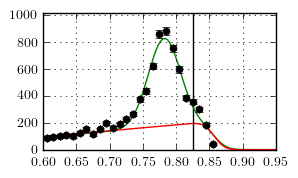

(76.83918563283818, 4.459728303602296)
(-7.136313863598148, 6.358181597375608)
(6.229553437865906, 6.326271863441189)
-
(66.38475838815978, 4.336428045982922)
(-10.703867022473993, 5.916960456890312)
(-3.905712957857605, 6.296094643610394)
-
(62.111986666864496, 4.178551975931948)
(-16.83123543667978, 5.758047168989054)
(8.732059492696825, 6.048420801568601)
-
(51.14742303332707, 4.128051551925881)
(14.790186225722294, 5.73530185918951)
(10.91655060040562, 5.534277618100723)
-
(34.38265966667028, 4.118018654138481)
(8.205905102903031, 5.556298969419905)
(13.828936930819864, 5.738712451448194)
-
(48.9622026541979, 4.524031585752027)
(20.723236265587182, 5.941470614181927)
(-0.744768200781969, 6.302711165088296)
-
(56.202208721631635, 4.884082613944693)
(17.150751766299162, 6.50960707945809)
(4.736684808432599, 6.686412600288884)
-
(63.0218749121649, 5.109625027287262)
(24.41370854913671, 7.0547136686422744)
(11.235862839858251, 6.865104372075238)
-
(76.13653747283763, 5.644195367462006)

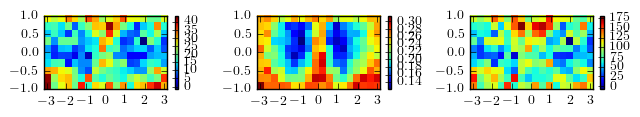

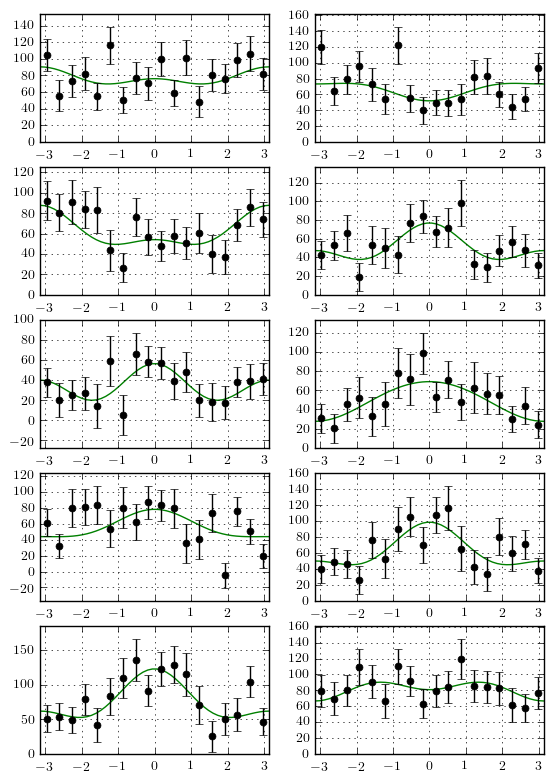

bjorken=0.562
Q2=2.986
W=1.790
epsilon=0.717
xsect_f=774.9 (alt: 774.9)
xsect_d=804.7


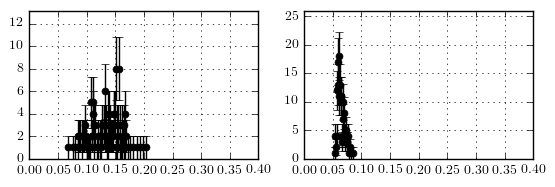

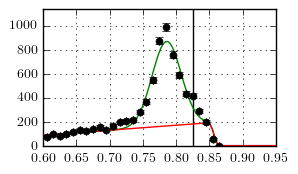

(106.07054672736565, 6.221907661233109)
(-8.524582033256014, 8.911669046371358)
(4.253850422667021, 8.762628921227341)
-
(101.91629845907097, 6.153463417060596)
(3.8455811996823592, 8.705544854993313)
(-0.1319157908098375, 8.733168029291447)
-
(81.9967041573159, 5.878632946436888)
(-2.1510837191341854, 8.512783883082005)
(10.860702786508377, 8.349696123297493)
-
(67.07181174534774, 5.793896421610526)
(-1.3181826972269617, 8.270175492928177)
(5.643404935367595, 8.326336211105028)
-
(55.466162154993384, 5.833897049127131)
(11.144143162705541, 8.12341389054895)
(10.429345307775316, 8.00715599553673)
-
(47.87898269366237, 5.4608121919364105)
(13.267136257151861, 7.870985413671467)
(3.2560223809846582, 7.4072970649596135)
-
(61.12301103110277, 6.302156605722009)
(10.725610835573294, 8.128160612172247)
(15.219262466495332, 8.978924801306574)
-
(82.87542642052269, 6.323355297453579)
(6.742972653016701, 8.657723225055934)
(11.771113647948049, 9.179145574834555)
-
(105.90225680573721, 6.7043707

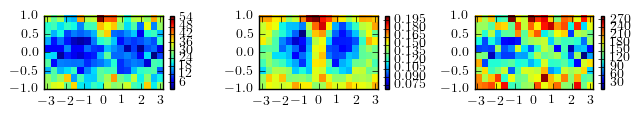

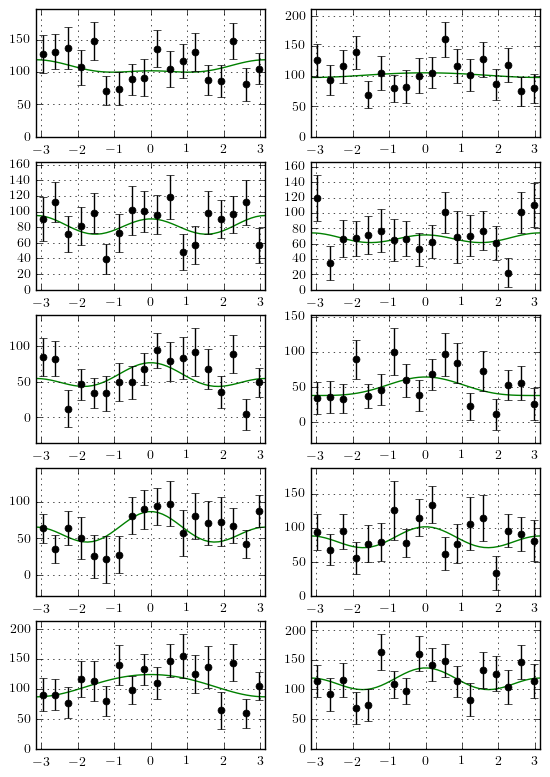

bjorken=0.562
Q2=2.986
W=1.790
epsilon=0.745
xsect_f=1036.1 (alt: 1036.1)
xsect_d=1083.0


In [23]:
W = 1.8
Q2 = [2.75, 3.25]
e1f_18 = calc_diff_xsects(W, Q2, False, e1f_exparms)
e16_18 = calc_diff_xsects(W, Q2, False, e16_exparms)

In [24]:
e1f_sim.h4s

[(<ROOT.THnSparseT<TArrayF> object ("h4t_1") at 0x35950f20>,
  <ROOT.THnSparseT<TArrayF> object ("h4r_1") at 0x3e070730>),
 (<ROOT.THnSparseT<TArrayF> object ("h4t_2") at 0x47f30110>,
  <ROOT.THnSparseT<TArrayF> object ("h4r_2") at 0x4832db40>),
 (<ROOT.THnSparseT<TArrayF> object ("h4t_3") at 0x4f545790>,
  <ROOT.THnSparseT<TArrayF> object ("h4r_3") at 0x59585ca0>)]

In [25]:
w8d_Q2_mean(2.75, 3.25)

2.9860917633540978